<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Wideband/WidebandAna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.7
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

In [3]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
root_file = 'drive/MyDrive/Wideband/crv.reco.wideband_cosmics_crvaging-001.run96.root'
uproot_file = uproot3.open(root_file)
uproot_tree = uproot_file["run0096"]

In [5]:
df = uproot_tree.pandas.df(['PEs', 'timeSinceSpill', 'spillNumber'], flatten=True)

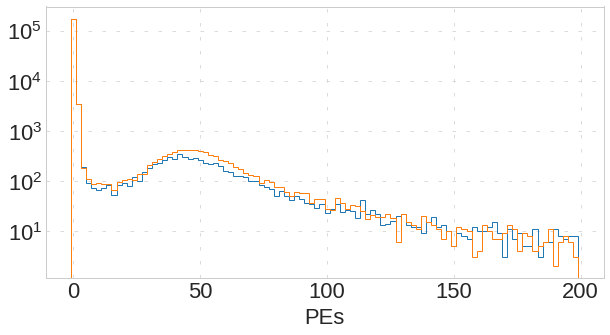

In [6]:
plt.hist(df['PEs[0][54]'], histtype='step', bins=100, range=(-1, 199));
plt.hist(df['PEs[1][54]'], histtype='step', bins=100, range=(-1, 199));
plt.xlabel('PEs')
plt.yscale('log')

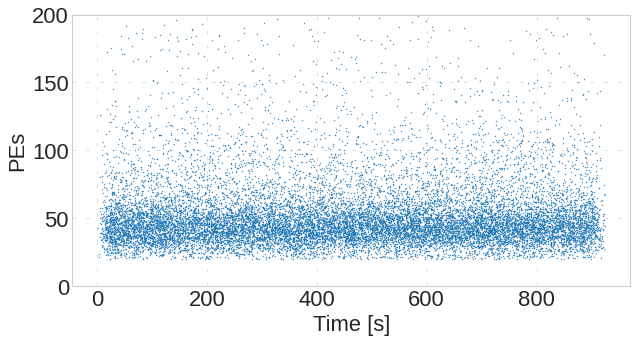

In [7]:
df_cut = df.loc[df['PEs[0][0]']>20]
plt.plot(df_cut['spillNumber'] + df_cut['timeSinceSpill[0][0]']/1e9, df_cut['PEs[0][0]'], '.', markersize=0.8)
plt.ylim(0,200)
plt.ylabel('PEs')
plt.xlabel('Time [s]');

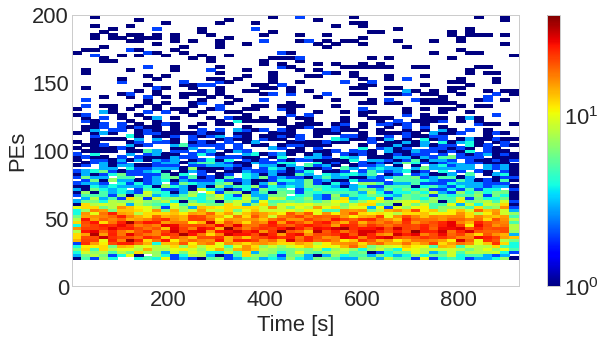

In [8]:
plt.hist2d(df_cut['spillNumber'] + df_cut['timeSinceSpill[0][0]']/1e9, df_cut['PEs[0][0]'], bins=(50,300), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet);
plt.ylim(0,200)
plt.colorbar()
plt.ylabel('PEs')
plt.xlabel('Time [s]');